In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dtype_list = {'event_id':np.int16, 'ref_type':'category', 'ref_hash':np.int64, 'aplication_id':np.int16, 'atributed':bool, \
              'device_countrycode':'category', 'trans_id':'category', 'device_os':'category', 'wifi':object,\
              'connection_type':'category'}
events = pd.read_csv('data/events.csv.gzip', dtype=dtype_list, parse_dates= ['date'])

In [ ]:
events['wifi'] = (events['wifi'] == 'true')

In [4]:
device_countrycode = events['device_countrycode'].unique()[0]
device_countrycode

'6333597102633388268'

In [5]:
del events['device_countrycode']

In [4]:
events['hour'] = events['date'].dt.hour

In [5]:
events['day'] = events['date'].dt.date

In [8]:
del events['event_uuid']

In [9]:
len(events)

2494423

In [10]:
events.head().T

,0,1,2,3,4
date,2019-03-05 00:09:36.966000,2019-03-05 00:09:38.920000,2019-03-05 00:09:26.195000,2019-03-05 00:09:31.107000,2019-03-09 21:00:36.585000
event_id,0,1,0,2,3
ref_type,1891515180541284343,1891515180541284343,1891515180541284343,1891515180541284343,1891515180541284343
ref_hash,2688759737656491380,2688759737656491380,2688759737656491380,2688759737656491380,2635154697734164782
application_id,38,38,38,38,38
attributed,False,False,False,False,False
device_os_version,5.9087e+17,5.9087e+17,5.9087e+17,5.9087e+17,7.39184e+18
device_brand,NaN,NaN,NaN,NaN,NaN
device_model,5.99012e+18,5.99012e+18,5.99012e+18,5.99012e+18,5.9609e+18
device_city,3.25822e+18,3.25822e+18,3.25822e+18,2.55178e+18,6.95933e+18


## **Top 5 Aplicaciones en la Ciudad con mas eventos**

Text(0.5, 0, 'Aplicaciones')

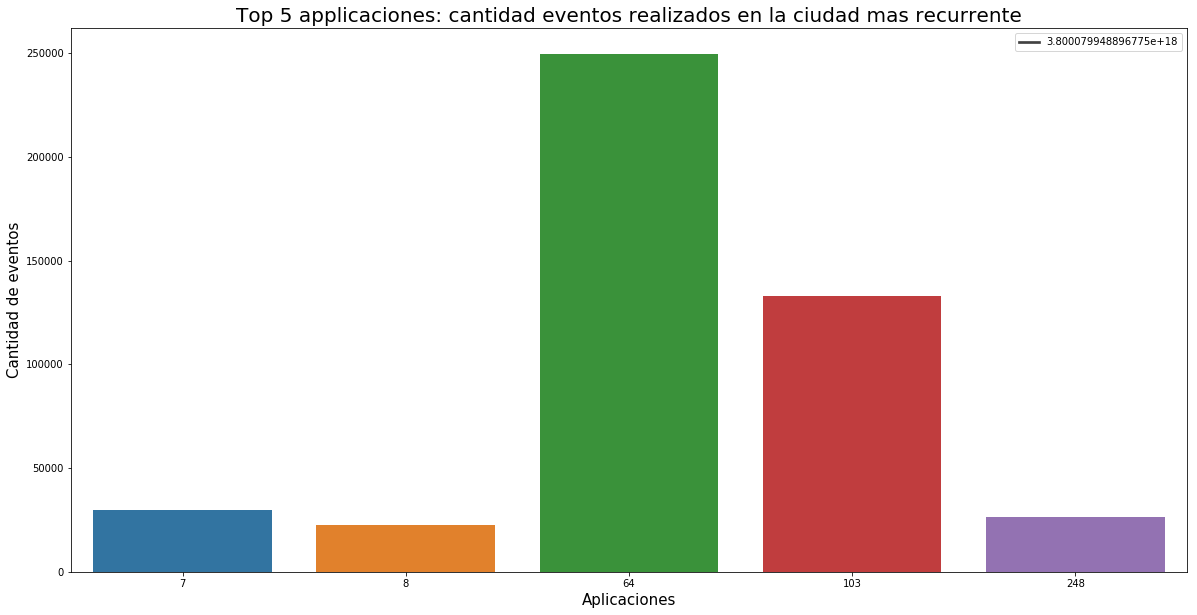

In [13]:
top_city = events['device_city'].value_counts().head(1).index

events_city_app = events.loc[events['device_city'].isin(top_city), ['application_id']].reset_index()
events_city_app.insert(loc = 1, column = 'cant', value = 1)
events_city_app = events_city_app.groupby(['application_id']).agg('sum').nlargest(5, 'cant').reset_index()

plt.figure(figsize=(20,10))
graph_city_app_events = sns.barplot (x=events_city_app['application_id'], \
                                     y=events_city_app['cant'], data = events_city_app)
graph_city_app_events.legend(labels=top_city)
graph_city_app_events.set_title("Top 5 applicaciones: cantidad eventos realizados en la ciudad mas recurrente", size=20)
graph_city_app_events.set_ylabel("Cantidad de eventos",size=15)
graph_city_app_events.set_xlabel("Aplicaciones", size=15)

## **Cantidad de Eventos Atribuidos por ref_type**

                  ref_type  attributed
11150  1891515180541284343        True
11151  1891515180541284343        True
11152  1891515180541284343        True
31408  1494519392962156891        True
31482  1494519392962156891        True


Text(0.5, 0, 'Tipo de publicidad')

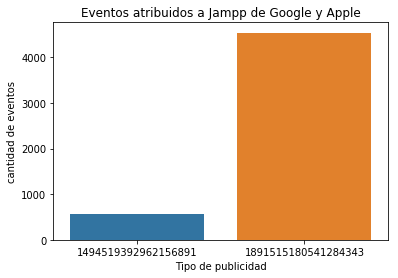

In [104]:
events_atributed_ref_type = events.loc[events['attributed'] == True][['ref_type', 'attributed']]
print(events_atributed_ref_type.head())
graph_attributed_events = sns.countplot(x ='ref_type', data = events_atributed_ref_type)

graph_attributed_events.set_title("Eventos atribuidos a Jampp de Google y Apple")
graph_attributed_events.set_ylabel("cantidad de eventos")
graph_attributed_events.set_xlabel("Tipo de publicidad")

## **Cantidad de eventos por hora**

Text(0.5, 0, 'Hora')

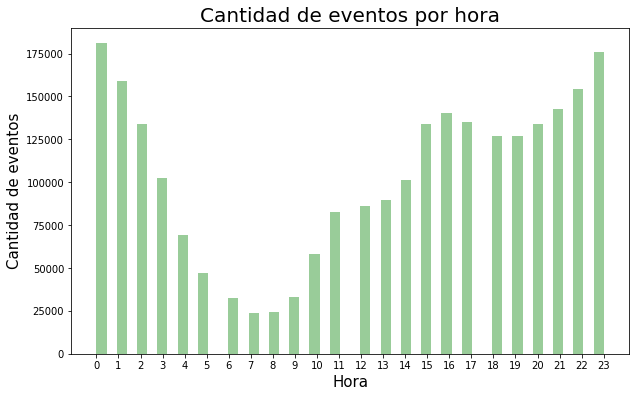

In [24]:
plt.figure(figsize=(10, 6))
event_for_hour = events.loc[:, ['hour', 'event_id']]
event_for_hour = event_for_hour.dropna()
graph = sns.distplot (event_for_hour['hour'], kde=False, rug=False, label ="Cantidad de eventos por hora",\
                      hist_kws={"color":"g"})
plt.xticks(np.arange(24), np.arange(24))
graph.set_title("Cantidad de eventos por hora", size=20)
graph.set_ylabel("Cantidad de eventos", size=15)
graph.set_xlabel("Hora", size=15)



## **Distrubucion de eventos por dia**

Text(0.5, 0, 'Hora')

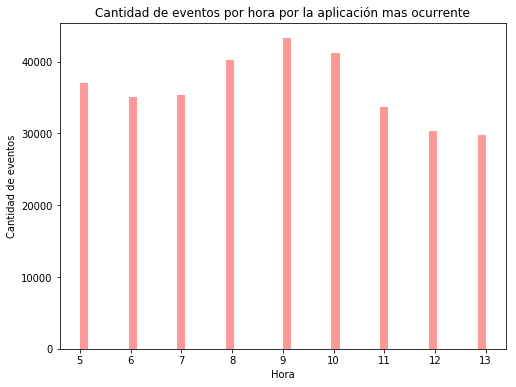

In [6]:
top_apps = events['application_id'].value_counts().head(1).index
events_app = events.loc[events['application_id'].isin(top_apps), ['day', 'application_id']]
# print(events_app)
events_app['day'] = pd.DatetimeIndex(events_app['day']).day;
events_app.insert(loc = 2, column = 'cant', value=1)
#events_app.groupby(['application_id', 'hour']).agg('count').reset_index()
events_app
plt.figure(figsize=(8, 6))
graph = sns.distplot (events_app['day'], kde=False, rug=False, label ="Cantidad de eventos por hora por aplicación",\
                      hist_kws={"color":"r"})
# plt.xticks(np.arange(24), np.arange(24))
graph.set_title("Cantidad de eventos por hora por la aplicación mas ocurrente")
graph.set_ylabel("Cantidad de eventos")
graph.set_xlabel("Hora")

## **Cantidad de eventos por hora y dia**

Text(0.5, 51.0, 'Dia')

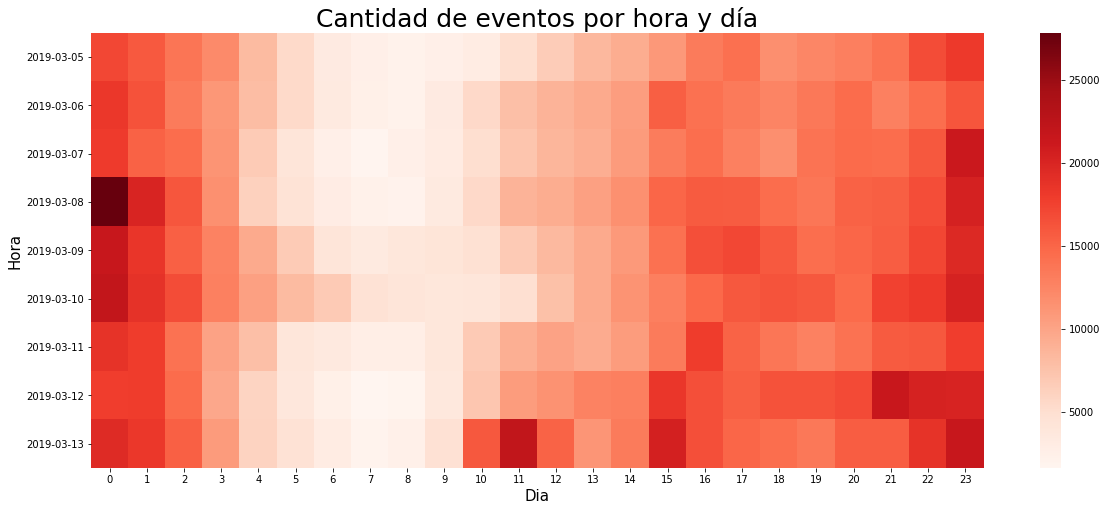

In [40]:
events_week_hour = events.loc[:,['hour', 'day']]
events_week_hour.insert(loc=2, column='cant_events', value=1)
events_week_hour = events_week_hour.pivot_table(index='hour', columns='day',\
                                                values='cant_events', fill_value=0, aggfunc=np.sum).T
plt.figure(figsize=(20,8))
graph = sns.heatmap(events_week_hour, cmap='Reds')
graph.set_title("Cantidad de eventos por hora y día", size=25)
graph.set_ylabel("Hora", size=15)
graph.set_xlabel("Dia", size=15)

## **Eventos atribuidos a jammp**

[None, None, None, None]

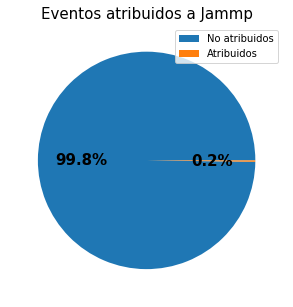

In [52]:
fig, ax = plt.subplots(figsize=(7, 5))
attributed_events = events['attributed'].value_counts()

patches, texts, floatt = plt.pie(attributed_events, autopct='%1.1f%%')

ax.set_title("Eventos atribuidos a Jammp", size=15)
plt.legend(patches, labels=['No atribuidos', 'Atribuidos'], loc="best")
plt.setp(floatt, size=15, weight="bold")

## **Dispositivo mas recurrente por hora**

Text(0.5, 0, 'Hora')

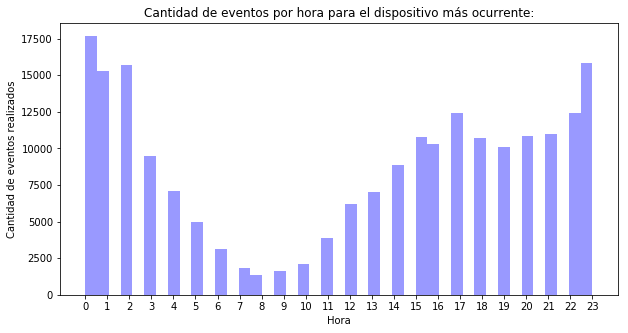

In [57]:
top_device_model = events['device_model'].value_counts().head(1).index

events_model = events.loc[events['device_model'].isin(top_device_model), ['hour']]
events_model.insert(loc=0, column='cant_events', value=1)

plt.figure(figsize=(10,5))
graph = sns.distplot (events_model['hour'], kde=False, rug=False, label="Histograma para dispositivo mas ocurrente",\
                      hist_kws={"color":"b"})
plt.xticks(np.arange(24), np.arange(24))
graph.set_title("Cantidad de eventos por hora para el dispositivo más ocurrente:")
graph.set_ylabel("Cantidad de eventos realizados")
graph.set_xlabel("Hora")

In [ ]:
events_device = events.loc[:, ['ref_hash', 'hour']]
events_device.insert(loc=2, column='cant_events', value=1)
events_device = events_device.groupby(['ref_hash', 'hour']).agg('sum')
#plt.figure(figsize=(25,15))
#graph = sns.barplot (x=events_device['hour'], y=events_device['cant_events'], data = events_device, hue = events_device['ref_hash'])
#graph = sns.violinplot ()
#graph.set_title("Cantidad de eventos por hora para el dispositivo más ocurrente:")
#graph.set_ylabel("Cantidad de eventos realizados")
#graph.set_xlabel("Hora")

## **TOP 5 Aplicaciones, eventos realizados por hora**

Text(0.5, 0, 'Aplicaciones')

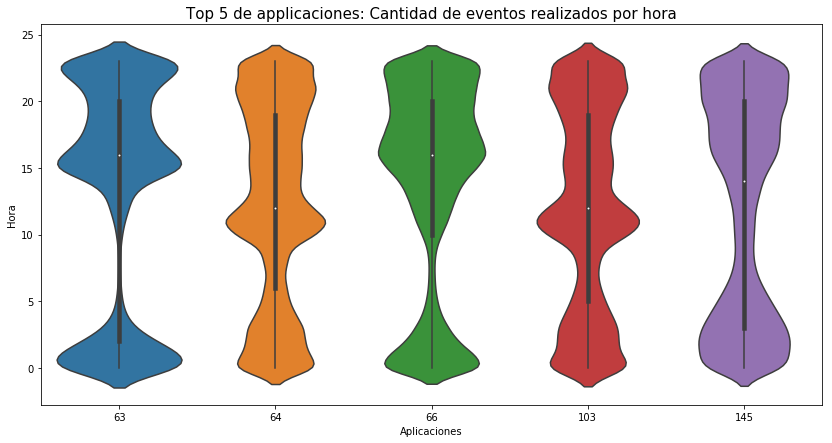

In [80]:
top_apps5 = events['application_id'].value_counts().head(5).index

events_apps = events.loc[events['application_id'].isin(top_apps5), ['application_id', 'hour']]
events_apps.insert(loc = 1, column = 'cant', value = 1)

plt.figure(figsize=(14,7))
graph = sns.violinplot (y=events_apps['hour'], x=events_apps['application_id'], data=events_apps)
graph.set_title("Top 5 de aplicaciones: Cantidad de eventos realizados por hora", size=15)
graph.set_ylabel("Hora")
graph.set_xlabel("Aplicaciones")

Text(0.5, 0, 'Aplicaciones')

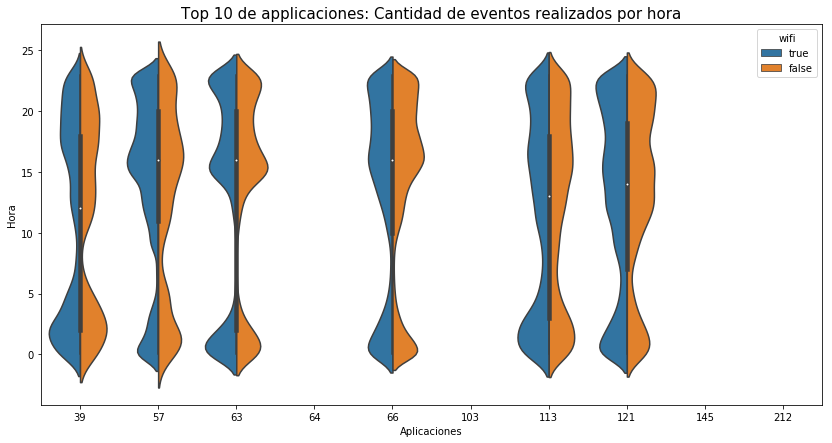

In [81]:
top_apps10 = events['application_id'].value_counts().head(10).index

events_apps = events.loc[events['application_id'].isin(top_apps10), ['application_id', 'hour', 'wifi']]
events_apps.insert(loc = 1, column = 'cant', value = 1)

plt.figure(figsize=(14,7))
graph = sns.violinplot (y='hour', x='application_id', hue='wifi', data=events_apps, split=True)
graph.set_title("Top 10 de applicaciones: Cantidad de eventos realizados por hora", size=15)
graph.set_ylabel("Hora")
graph.set_xlabel("Aplicaciones")

## **TOP 20 Aplicaciones**

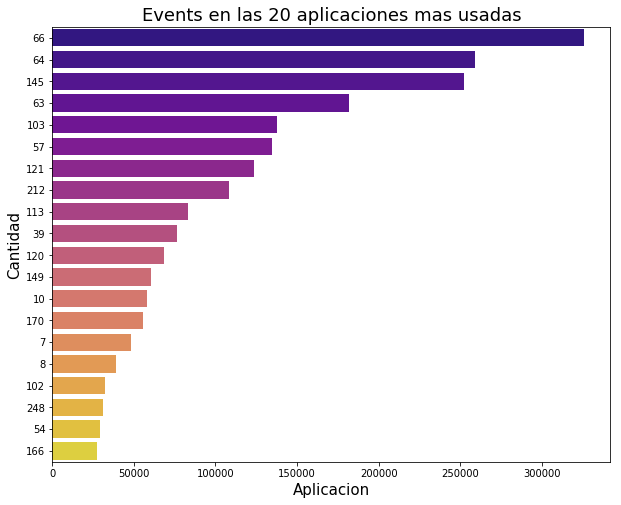

In [90]:
plt.figure(figsize=(10, 8))
g = sns.countplot(y="application_id", data=events, palette="plasma", \
                  order=events['application_id'].value_counts().head(20).index)
g.set_title("Events en las 20 aplicaciones mas usadas", fontsize =18)
g.set_xlabel("Aplicacion", fontsize = 15)
g.set_ylabel("Cantidad", fontsize = 15)
plt.savefig('image/events_bar_top20_app')

## **TOP 5 events por hora**

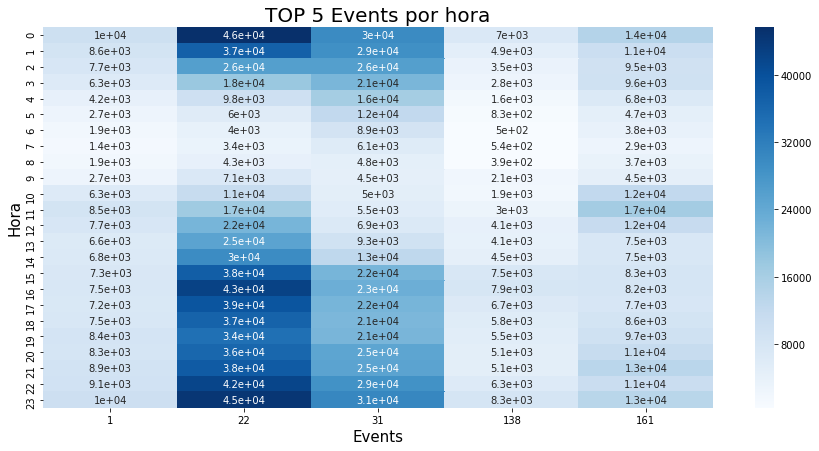

In [83]:
top5_event_id = events['event_id'].value_counts().head(5).index
top5_group = events.loc[events['event_id'].isin(top5_event_id)]
event_id_hour = top5_group.groupby(['event_id', 'hour']).size().unstack()
event_id_hour = event_id_hour.fillna(0).T
plt.figure(figsize=(15, 7))
heap_map = sns.heatmap(event_id_hour, cbar=True, cmap="Blues", annot=True)
heap_map.set_title("TOP 5 Events por hora", fontsize=20)
heap_map.set_xlabel("Events", fontsize=15)
heap_map.set_ylabel("Hora", fontsize=15)
plt.savefig('image/events_heat_hour_eventid', bbox_inches = 'tight', pad_inches = 0.1)

## **TOP 5 kinds por hora**

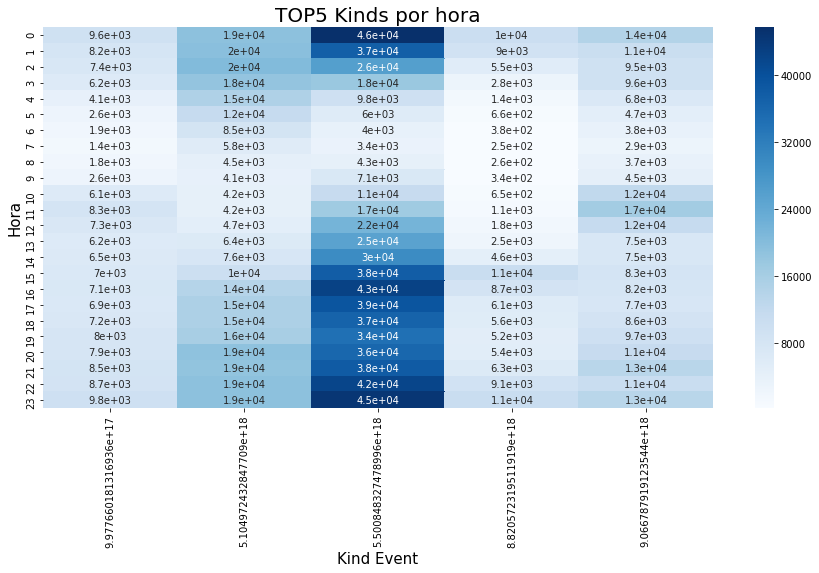

In [89]:
top5_kind = events['kind'].value_counts().head(5).index
top5_group = events.loc[events['kind'].isin(top5_kind)]
kind_hour = top5_group.groupby(['kind', 'hour']).size().unstack()
kind_hour = kind_hour.fillna(0).T

plt.figure(figsize=(15, 7))
heat_kind_hour = sns.heatmap(kind_hour, cbar=True, cmap="Blues", annot=True)

heat_kind_hour.set_xticklabels(heat_kind_hour.get_xticklabels(), rotation=90)
heat_kind_hour.set_title("TOP5 Kinds por hora", fontsize=20)
heat_kind_hour.set_xlabel("Kind Event", fontsize=15)
heat_kind_hour.set_ylabel("Hora", fontsize=15)
plt.savefig('image/events_heat_hour_kind', bbox_inches = 'tight', pad_inches = 0.1)

## **TOP 5 aplicaciones por dia**

In [78]:
date = events['day'].value_counts().index.sort_values()

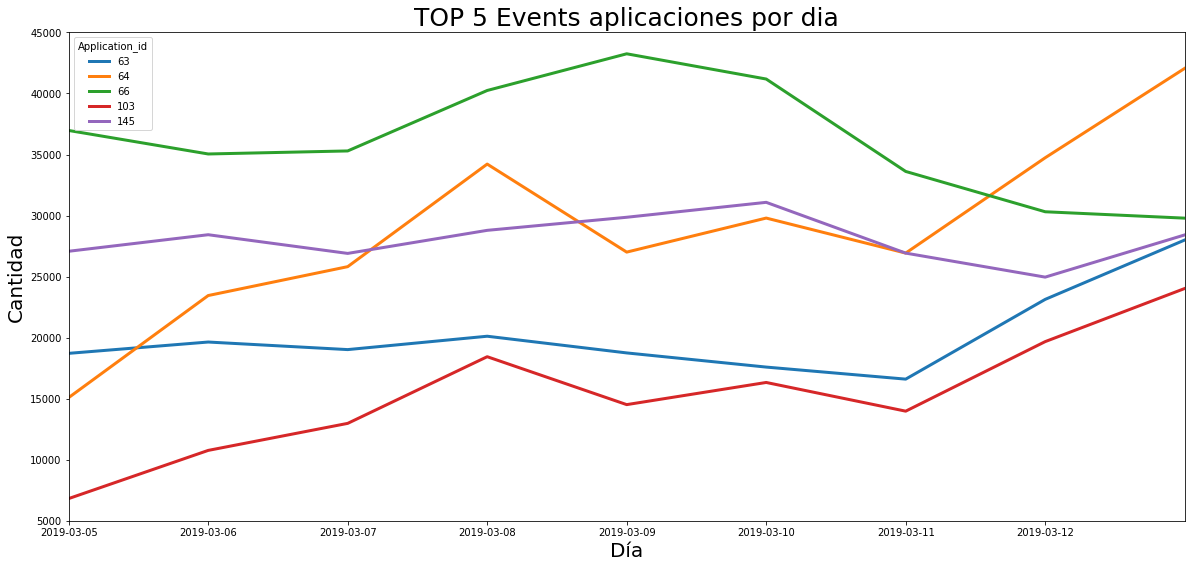

In [91]:
top5_group = events.loc[events['application_id'].isin(top_apps5)]
top_e = top5_group.groupby(['application_id', 'day']).size()
 
fig, ax = plt.subplots()
for key, grp in top_e.groupby(['application_id']):
    ax = grp.plot(ax=ax, kind='line', x='day', y='count', label=key, figsize=(20,9), lw=3)
plt.title("TOP 5 Events aplicaciones por dia",size=25)
ax.set_ylabel('Cantidad',size=20)
ax.set_xlabel('Día',size=20)
plt.legend(title='Application_id')
plt.xticks(np.arange(8), date)
plt.savefig('image/events_line_app_day', bbox_inches = 'tight', pad_inches = 0.1)
plt.show()

## **TOP 5 Device OS VERSION**

In [6]:
# top_device_os_version = events['device_os_version'].value_counts().head(5).index
# top_group = events.loc[events['device_os_version'].isin(top_device_os_version)]

# plt.figure(figsize=(15, 6))
 
# device_group = sns.countplot(y=top_group['ref_hash'], data=top_group, palette='PiYG', log=True,\
#                               order=top_group['ref_hash'].value_counts().index)
# device_group.set_title("TOP 5 Device Os Version por cantidad de eventos", fontsize =20)
# device_group.set_xlabel('Cantidad', fontsize = 20)
# device_group.set_ylabel("Device_os_version", fontsize = 20)
# plt.savefig('image/events_bar_device_os')


## **Conection type**

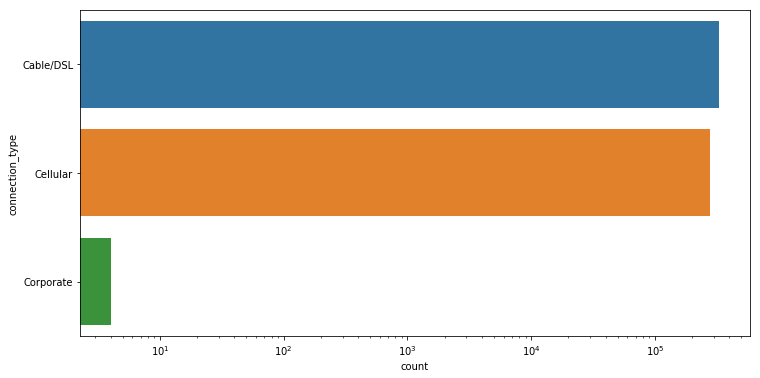

In [21]:
plt.figure(figsize=(12, 6))
sns.countplot(y="connection_type", data=events, log=True)

## **Cantidad de events por ciudad**

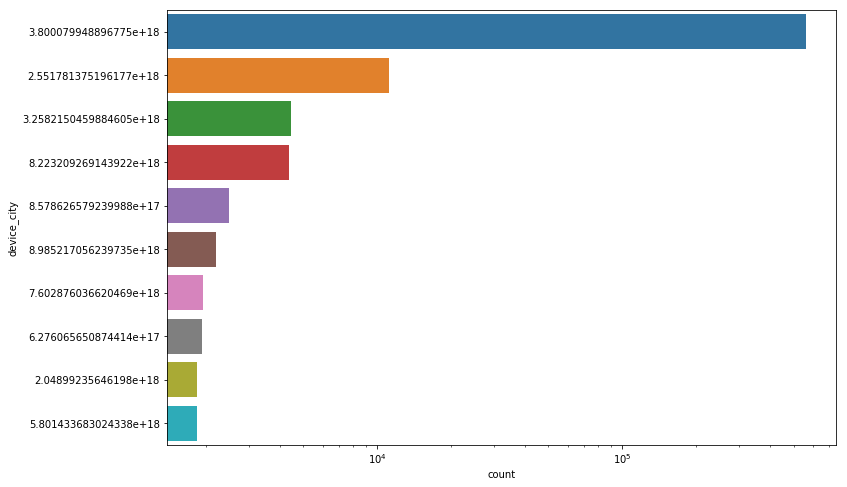

In [38]:
top_city = events['device_city'].value_counts().head(10).index
top_group_city = events.loc[events['device_city'].isin(top_city)]
plt.figure(figsize=(12, 8))

sns.countplot(y="device_city", data=top_group_city, log=True, order=top_group_city['device_city'].value_counts().index)

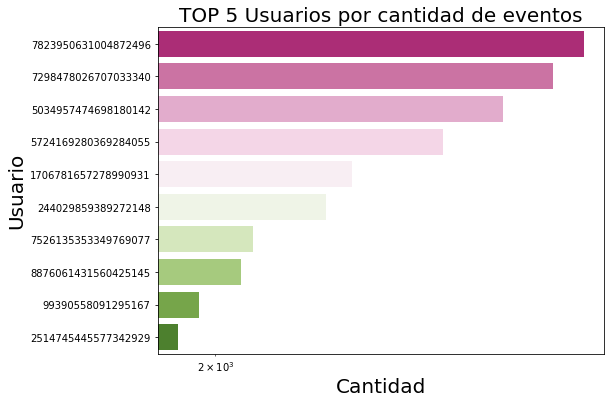

In [122]:
top_usuarios = events['ref_hash'].value_counts().head(10).index
top_group = events.loc[events['ref_hash'].isin(top_usuarios), ['ref_hash']]

plt.figure(figsize=(8, 6))
 
hash_ref_group = sns.countplot(y=top_group['ref_hash'], data=top_group, palette='PiYG', log=True,\
                              order=top_group['ref_hash'].value_counts().index)
hash_ref_group.set_title("TOP 5 Usuarios por cantidad de eventos", fontsize =20)
hash_ref_group.set_xlabel('Cantidad', fontsize = 20)
hash_ref_group.set_ylabel("Usuario", fontsize = 20)
plt.savefig('image/events_bar_refhash')

## **Eventos de TOP 10 Usuarios**

[Text(0, 0, '99390558091295167'),
 Text(0, 0, '244029859389272148'),
 Text(0, 0, '1706781657278990931'),
 Text(0, 0, '2514745445577342929'),
 Text(0, 0, '5034957474698180142'),
 Text(0, 0, '5724169280369284055'),
 Text(0, 0, '7298478026707033340'),
 Text(0, 0, '7526135353349769077'),
 Text(0, 0, '7823950631004872496'),
 Text(0, 0, '8876061431560425145')]

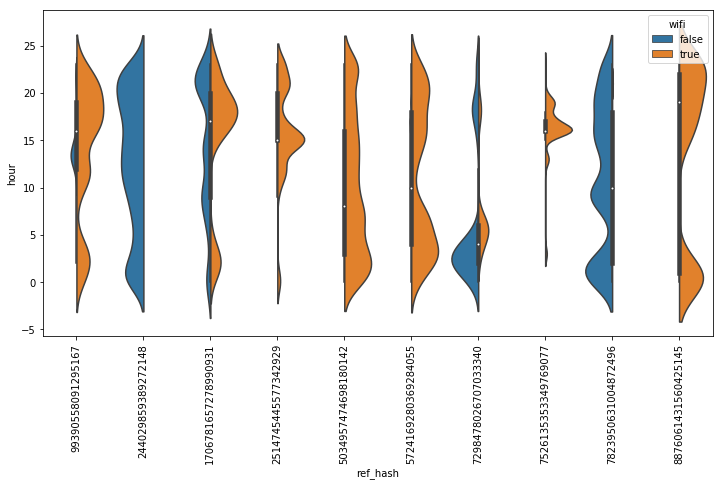

In [45]:
top_usuarios = [x for x in events['ref_hash'].value_counts().head(10).keys()]
top_group = events.loc[events['ref_hash'].isin(top_usuarios), ['ref_hash', 'event_id', 'wifi', 'hour']]
top_group.reset_index(inplace=True)
del top_group['index']

plt.figure(figsize=(12,6))
usuarios_wifi_events_g = sns.violinplot(x='ref_hash', y='hour', hue='wifi', data=top_group, \
                                        split=True, scale="count", pallete="muted")
usuarios_wifi_events_g.set_xticklabels(usuarios_wifi_events_g.get_xticklabels(), rotation=90)

Text(0, 0.5, 'Device Language')

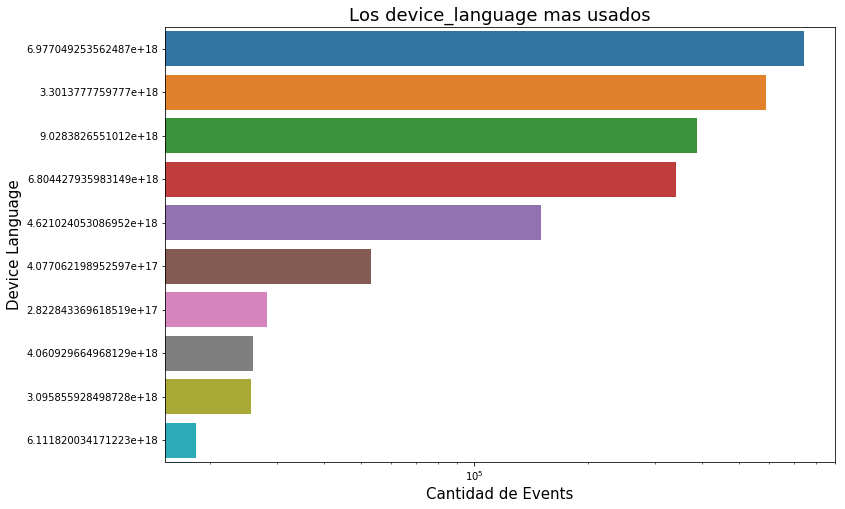

In [48]:
top_language = events['device_language'].value_counts().head(10).index
top_group_language = events.loc[events['device_language'].isin(top_language)]
plt.figure(figsize=(12, 8))

g1 =sns.countplot(y="device_language", data=top_group_language, log=True, \
              order=top_group_language['device_language'].value_counts().index)

g1.set_title("Los device_language mas usados", fontsize =18)
g1.set_xlabel("Cantidad de Events", fontsize = 15)
g1.set_ylabel("Device Language", fontsize = 15)